In [27]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats
sns.set()
sns.set_style('white')

### Data Loading 

In [28]:
data_path = '../data/data_by_group/'
data_list = ['1','2','3','4','5']
start_date = '2005-01-01'
end_date = '2020-03-26'

In [29]:
def load_data(file_path,rating_class,start_date,end_date):
    path = file_path+str(rating_class)+'/'
    files = os.listdir(path)
    output_path='../data/rating_class_%s.csv'%str(rating_class)
    for i in range(len(files)):
        data_path = path+files[i]
        temp_df = pd.read_csv(data_path)
        date=temp_df[temp_df.columns[0]][1:]
        temp_df['Date'] = pd.to_datetime(date,format='%Y%m%d')
        temp_df.set_index('Date',inplace=True)
        temp_df = temp_df[start_date:end_date]
        if i==0:
            result_df=temp_df
        else:
            result_df=pd.concat([result_df, temp_df], axis=1)
        result_df.to_csv(output_path, index=True)
    
    return result_df

In [30]:
rating_1_df = load_data(data_path,1,start_date,end_date)
rating_2_df = load_data(data_path,2,start_date,end_date)
rating_3_df = load_data(data_path,3,start_date,end_date)
rating_4_df = load_data(data_path,4,start_date,end_date)
rating_5_df = load_data(data_path,5,start_date,end_date)

In [31]:
rating_1_df.head()

,1st Source Corp,3i Group PLC,BlackRock Inc,Bridge Capital Holdings,Bridgemarq Real Estate Services,CVB Financial Corp,Daesung Private Equity Inc,Finbar Group Ltd,Gecina SA,Globe Life Inc,Guardian Capital Group Ltd,Landmark Bancorp Inc/Manhattan KS,Malayan Banking Bhd,MutualFirst Financial Inc,NBT Bancorp Inc,Societe Fonciere Lyonnaise SA,Urstadt Biddle Properties Inc,US Bancorp,US Global Investors Inc,Zurich Insurance Group AG
Date,,,,,,,,,,,,,,,,,,,,
2005-01-01,6.452600,0.417814,14.809923,10.944022,0.000356,2.547780,0.504351,0.953285,1.633869,0.058108,0.006637,5.044557,8.212401,7.333824,2.273825,0.847121,0.001725,0.794635,0.288658,7.529812
2005-01-02,6.452600,0.417814,14.809923,10.944022,0.000356,2.547780,0.504351,0.953285,1.633869,0.058108,0.006637,5.044557,8.212401,7.333824,2.273825,0.847121,0.001725,0.794635,0.288658,7.529812
2005-01-03,6.619952,0.417814,15.275436,10.636545,0.000356,2.512832,0.507905,0.953285,1.584487,0.059992,0.006637,5.134598,8.465379,7.584903,2.482679,0.847671,0.001834,0.826459,0.262982,7.248306
2005-01-04,7.726963,0.391659,15.194908,11.815782,0.000314,2.723805,0.500078,0.966884,1.663850,0.062940,0.007683,5.081459,8.461687,7.200371,2.823237,0.840350,0.001854,0.839010,0.281635,6.990770
2005-01-05,8.101278,0.405360,15.254030,11.672923,0.000307,2.978919,0.476694,0.973617,1.696928,0.062078,0.007662,4.542413,8.209515,7.273141,3.069125,0.848673,0.002098,0.805430,0.347527,7.282299


### Data Characteristic 

In [32]:
#Plot Average level of Default Probabilits in the data sef
comb_data = pd.concat([rating_1_df,rating_2_df,rating_3_df,rating_4_df,rating_5_df],axis=1)
average_all_level = comb_data.mean(axis=1)

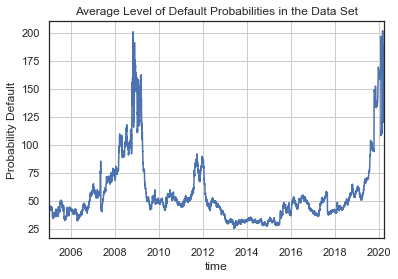

In [33]:
average_all_level.plot()
plt.title('Average Level of Default Probabilities in the Data Set')
plt.ylabel('Probability Default')
plt.xlabel('time')
plt.grid()
plt.show()

In [34]:
#plot Avarage Level of Defaut Probabilities in Each Rating Class
final_data = None
for i in range(1,6):
    col_name = 'Rating '+str(i)
    data_df = pd.DataFrame(data=(comb_data.iloc[:,(i-1)*20:20*i ]).mean(axis=1),columns=[col_name])
#     data_df.rename(columns={data_df.columns[0]:col_name})
#     data_df = data_df.mean(axis=1)
    final_data = pd.concat([final_data,data_df],axis=1)
    


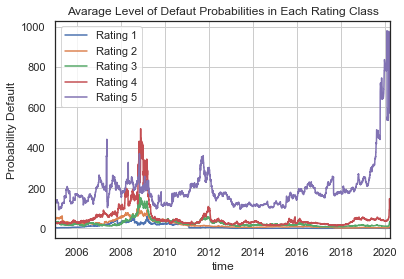

In [35]:
final_data.plot()
plt.title('Avarage Level of Defaut Probabilities in Each Rating Class')
plt.ylabel('Probability Default')
plt.xlabel('time')
plt.grid()
plt.legend()
plt.show()

In [36]:
final_data.apply(min).T

Rating 1     0.278512
Rating 2     2.089974
Rating 3     7.563963
Rating 4    13.711202
Rating 5    93.379713
dtype: float64

In [37]:
def describe_data(data_df):
    col_name = ['Min','Max','Mean','Std','Skew','Kurtosis']
    lomo_df = pd.DataFrame(data_df.count().T,columns=['Count'])
    for function in col_name:
        lomo_df[function] = data_df.apply(str.lower(function))
    return lomo_df

In [38]:
level_df = describe_data(final_data)
level_df

,Count,Min,Max,Mean,Std,Skew,Kurtosis
Rating 1,5564,0.278512,60.497325,8.939464,11.561562,1.413221,1.127285
Rating 2,5564,2.089974,98.618810,20.046230,19.904008,1.481384,1.527389
Rating 3,5564,7.563963,168.764179,25.337388,20.648640,3.254135,12.589380
Rating 4,5564,13.711202,494.697090,50.925267,55.664673,3.870429,17.656244
Rating 5,5564,93.379713,980.275962,194.560495,107.969828,3.565329,15.449609


In [39]:
change_df = (final_data - final_data.diff()).dropna(axis=0)
change_df_summary = describe_data(change_df)
change_df_summary

,Count,Min,Max,Mean,Std,Skew,Kurtosis
Rating 1,5563,0.278512,60.497325,8.940934,11.562081,1.412967,1.126522
Rating 2,5563,2.089974,98.618810,20.048707,19.904939,1.481129,1.526576
Rating 3,5563,7.563963,168.764179,25.337555,20.650493,3.253820,12.586486
Rating 4,5563,13.711202,494.697090,50.916841,55.666128,3.871168,17.660056
Rating 5,5563,93.379713,980.275962,194.452353,107.677756,3.566715,15.492943


### kendall's tau

In [40]:
#for PD levels
final_data.corr(method='kendall')

,Rating 1,Rating 2,Rating 3,Rating 4,Rating 5
Rating 1,1.000000,0.636353,0.517203,0.551604,0.087770
Rating 2,0.636353,1.000000,0.585186,0.371215,-0.039457
Rating 3,0.517203,0.585186,1.000000,0.357620,-0.025086
Rating 4,0.551604,0.371215,0.357620,1.000000,0.301711
Rating 5,0.087770,-0.039457,-0.025086,0.301711,1.000000


In [41]:
#for PD changes
change_df.corr(method='kendall')

,Rating 1,Rating 2,Rating 3,Rating 4,Rating 5
Rating 1,1.000000,0.636400,0.517384,0.551949,0.088021
Rating 2,0.636400,1.000000,0.585329,0.371432,-0.039314
Rating 3,0.517384,0.585329,1.000000,0.357554,-0.025229
Rating 4,0.551949,0.371432,0.357554,1.000000,0.301534
Rating 5,0.088021,-0.039314,-0.025229,0.301534,1.000000


### Asymmetric correlation for every pair of rating classed in the data 

In [42]:
data_df = (final_data - final_data.mean()) / final_data.std()

In [43]:
data_df.head()

,Rating 1,Rating 2,Rating 3,Rating 4,Rating 5
Date,,,,,
2005-01-01,-0.467644,1.653326,0.106745,-0.420497,-0.541224
2005-01-02,-0.467644,1.653326,0.221923,-0.374378,-0.541224
2005-01-03,-0.464294,1.659212,0.142862,-0.424663,-0.541697
2005-01-04,-0.455017,1.628709,0.188219,-0.420882,-0.539842
2005-01-05,-0.453136,1.499836,0.212895,-0.398759,-0.579499
